In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = '/Users/bjlim/Desktop/GW Homework/HW_5/Instructions/Pyber/data/city_data.csv'
ride_data_to_load = '/Users/bjlim/Desktop/GW Homework/HW_5/Instructions/Pyber/data/ride_data.csv'

# Read the City and Ride Data
city_data_pd = pd.read_csv(city_data_to_load)
ride_data_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
all_data_pd = pd.merge(city_data_pd, ride_data_pd, how='outer', on='city')

# Display the data table for preview
all_data_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


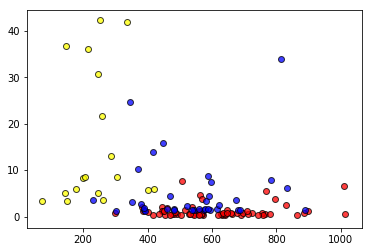

In [67]:
grouped_by_type = all_data_pd.groupby('type')
urban_group = all_data_pd.loc[all_data_pd['type']== 'Urban']
suburban_group = all_data_pd.loc[all_data_pd['type']== 'Suburban']
rural_group = all_data_pd.loc[all_data_pd['type']== 'Rural']
rural_grouped = rural_group.groupby('city')
urban_grouped = urban_group.groupby('city')
suburban_grouped = suburban_group.groupby('city')


rural_total = rural_grouped.sum()
urban_total = urban_grouped.sum()
suburban_total = suburban_grouped.sum()

rural_total['y_axis']= rural_total['fare']/rural_total['driver_count']
urban_total['y_axis']= urban_total['fare']/urban_total['driver_count']
suburban_total['y_axis']= suburban_total['fare']/suburban_total['driver_count']

rural_xaxis = rural_total['fare']
urban_xaxis = urban_total['fare']
suburban_xaxis = suburban_total['fare']

rural_yaxis = rural_total['y_axis']
urban_yaxis = urban_total['y_axis']
suburban_yaxis = suburban_total['y_axis']


## Bubble Plot of Ride Sharing Data

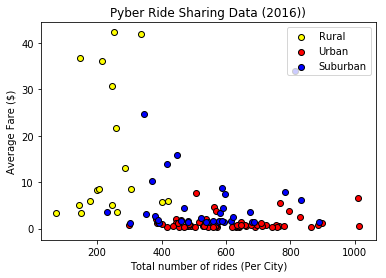

In [93]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
plt.scatter(rural_xaxis, rural_yaxis, marker='o', facecolors='yellow', edgecolors='black', alpha=1.0, label = 'Rural' )
plt.scatter(urban_xaxis, urban_yaxis, marker='o', facecolors='red', edgecolors='black', alpha=1.0, label = 'Urban')
plt.scatter(suburban_xaxis, suburban_yaxis, marker='o', facecolors='blue', edgecolors='black', alpha=1.0, label = 'Suburban')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016))')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare ($)')
# Create a legend
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size

# Save Figure


In [143]:
all_data_pd['type'].value_counts()
vote_by_type = all_data_pd['type'].value_counts()
total_votes = vote_by_type.sum()
percentages_votes = vote_by_type/total_votes
percentages_votes
vote_types = ['Urban','Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue','yellow']

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

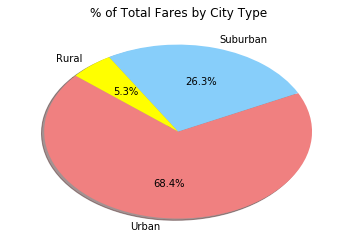

In [144]:
# Calculate Type Percents
plt.pie(vote_by_type, labels=vote_types, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
# Build Pie Chart
plt.title('% of Total Fares by City Type')
# Save Figure


## Total Rides by City Type

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

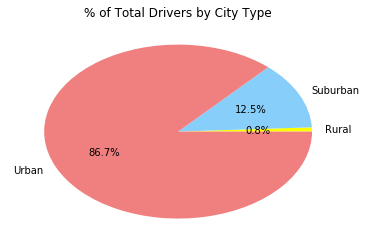

In [146]:
# Calculate Driver Percents
grouped_data = all_data_pd.groupby('type')
driver_total = grouped_data['driver_count'].sum()
driver_total
group_name = ['Rural', 'Suburban','Urban']
# Build Pie Charts
colors = ['yellow', 'lightskyblue', 'lightcoral']
# Save Figure
plt.pie(driver_total, labels=group_name, colors = colors, autopct='%1.1f%%')
plt.title('% of Total Drivers by City Type')